In [ ]:
# Note -- most of this primer is in contrast with matlab code. Any reference to "this instead of that" is meaning 
# the difference between python syntax relative to matlab.

# USE SHIFT+ENTER TO RUN EACH BLOCK IN THIS NOTEBOOK FILE

In [37]:
# comments use pound symbol
# use ctrl+/ to comment/uncomment a line or block of lines
 
# unlike in matlab, in python packages must be imported. Here I import a few handy packages 

from matplotlib import pyplot as plt  # pyplot is the default visualization package in python

import numpy as np                    # numpy deals with numerical operations 
                                      # (think sqrt, multiply (elementwise), divide (elementwise), etc.)

import scipy as sp                    # scipy has a number of scientific computing functions, eg Gaussian quad int

import heliopy as hp                  # heliopy is a heliosphysics package. 
                                      # I haven't used this much but supposedly it has MMS capabilities.

import aidapy as aida                 # aidapy is a MMS specific package


# some other useful stuff
from datetime import datetime
#AIDApy Modules
from aidapy import load_data
from IPython.display import Image

In [38]:
# In python functions are defined as follows -- this example does newton's root finding method for the function x^2-2

def newton(xo):   # "def" is the keyword to make a function, which is followed by fcn_name(inputs): 
                                                                    ###!!! don't forget the colon ^
    n=0
    xk=xo
    while abs(xk**2 - 2) > 1e-15:   # in python while/for/if statements initiate with a colon and have no "end"
        xk=xk-(xk**2-2)/(2*xk)      # these code blocks must respect the same level of tab/spaces (not both)
        
        n+=1                        # python allows for n+=variable instead of matlab's n=n+variable syntax
        if n>200:
            print("Newton iterations did not converge in 200 iterations.") # "print" instead of "disp" 
            return
    return(xk)                      # python functions end with return(output) 
          
newton(2)

1.4142135623730951

In [39]:
# Similar to matlab, python has list objects specificed with brackets, i.e.

tmp=[]
for i in np.linspace(0,10,11):
    tmp.append(i)
print(tmp)

tmp=[]
for jj in range(1,11):    # python's build-in "range" function behaves like doing 1:10 in matlab, except the range is an range object, not an array
    tmp.append(jj)
display(tmp)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [40]:
# Packages: to call a package, refer to the nicknames used in the first cell, and call the package using the 
# nickname followed by a period "." followed by the function. Refer to the examples below. 
# 
# Going back to arrays and basic numerical analysis, I prefer to use numpy "nd-arrays" most of the time. 
# Numpy is the most similar to working with native matlab.


# a few useful numpy objects
x = np.arange(1,11)              # this is most like doing, for example 1:10 in matlab

display(x)                       # in python all lines are suppressed unless you choose to print/display a variable
                                 # no need to toss ';' at the end of every line

x=np.linspace(1,10,11)           # same as matlab's linspace
print(x)


# numpy contains a function for sqrt, exp, log, sin, cos, multiply, add, divide, subtract, etc. 


# http://datacamp-community-prod.s3.amazonaws.com/da466534-51fe-4c6d-b0cb-154f4782eb54
# this cheatsheet ^^^ shows a lot of great numpy stuff, and also google is your friend 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

[ 1.   1.9  2.8  3.7  4.6  5.5  6.4  7.3  8.2  9.1 10. ]


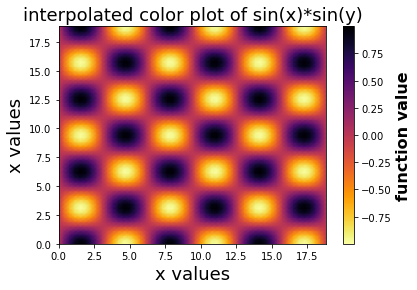

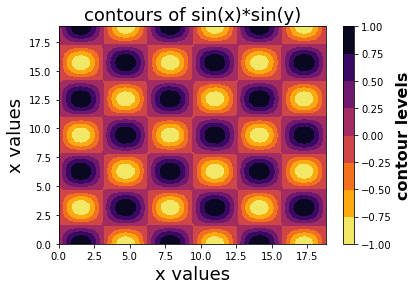

In [41]:
# matplotlib has similar syntax to matlabs plotting routines
%matplotlib inline

x=np.linspace(0,6*np.pi)
y=np.linspace(0,6*np.pi)
[xm,ym]=np.meshgrid(x,y)

fig, ax = plt.subplots()
im = ax.pcolormesh( xm, ym, np.sin(xm)*np.cos(ym), cmap='inferno_r', shading='gouraud' )

plt.colorbar(im).set_label(label='function value',size=16,weight='bold')
plt.xlabel('x values',fontsize=18)
plt.ylabel('x values',fontsize=18)
plt.title('interpolated color plot of sin(x)*sin(y)',fontsize=18)


fig1, ax1 = plt.subplots()
im = ax1.contourf( xm, ym, np.sin(xm)*np.cos(ym), cmap='inferno_r')

plt.colorbar(im).set_label(label='contour levels',size=16,weight='bold')
plt.xlabel('x values',fontsize=18)
plt.ylabel('x values',fontsize=18)
plt.title('contours of sin(x)*sin(y)',fontsize=18)


# in this notebook file all figures will automatically display underneath this code cell. However generally
# matplotlib requires a call to show the figure, i.e.
plt.show()



Text(0.5, 0.92, '3d surface plot sin(x)*sin(y)')

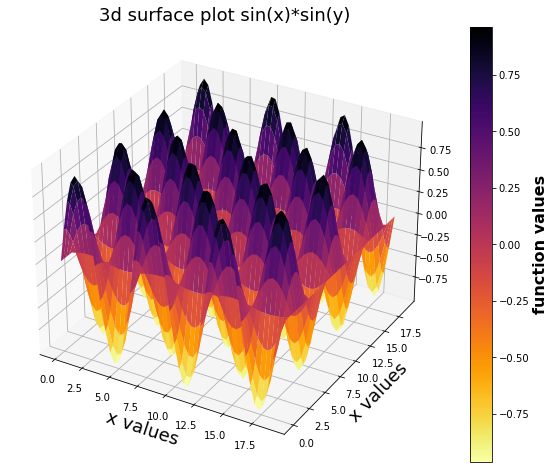

In [52]:
# jupyter notebook files allow for interactive plots, but it won't run in this binderhub server 
#%matplotlib widget 


fig2, ax2 = plt.subplots(figsize=(10,8),subplot_kw={"projection": "3d"})

im = ax2.plot_surface( xm, ym, np.sin(xm)*np.cos(ym), cmap='inferno_r')

plt.colorbar(im).set_label(label='function values',size=16,weight='bold')
plt.xlabel('x values',fontsize=18)
plt.ylabel('x values',fontsize=18)
plt.title('3d surface plot sin(x)*sin(y)',fontsize=18)



In [43]:
# There is a lot more syntax details to learn, but let's try to dive headfirst by using MMS packages to look at 
# real data. 

# We can use several packages to download MMS data, I am still exploring options but now I see that
# heliopy and aidapy both provide easy data download options. I think aidapy, which was developed 
# as mostly MMS specific code, uses routines from heliopy and sunpy, so let's start there. 

display(aida.get_mission_info(mission='mms'))

display(aida.get_mission_info(mission='mms', product='magnetic field'))



All available keywords for mms mission data products: 


{'name': 'mms',
 'allowed_probes': ['1', '2', '3', '4'],
 'data_settings': ['sc_pos',
  'sc_att',
  'dc_mag',
  'dc_elec',
  'i_dens',
  'e_dens',
  'e_bulkv',
  'i_bulkv',
  'i_dist',
  'e_dist',
  'e_temppara',
  'e_tempperp',
  'i_temppara',
  'i_tempperp',
  'i_omniflux',
  'i_energy',
  'i_aspoc',
  'i_prestens',
  'i_temptens',
  'i_heatq']}

All available keywords for data products containing 'magnetic field': 


['dc_mag']

In [44]:
###############################################################################
# Define data parameters
###############################################################################
# Time Interval
start_time = datetime(2017, 8, 10, 12, 18, 0) #2017,8,10,12,18,0
end_time = datetime(2017, 8, 10, 12, 19, 0)

# Dictionary of data settings: mission, product, probe, coordinates
#settings = {'prod': ['dc_mag'], 'probes': ['1', '2'], 'coords': 'gse'}
settings = {'prod': ['dc_mag'], 'probes': ['1','2','3','4'], 'coords': 'gse'}


###############################################################################
# Download and load desired data as aidapy timeseries
###############################################################################
xr_mms = load_data(mission='mms', start_time=start_time, end_time=end_time, **settings)


/home/jack/miniconda3/envs/aidapy/lib/python3.8/site-packages/heliopy/data/util.py:570: UserWarning: The CDF provided units ('hours') for key 'mms1_mec_mlt' are unknown
  warnings.warn(message)
/home/jack/miniconda3/envs/aidapy/lib/python3.8/site-packages/heliopy/data/util.py:570: UserWarning: The CDF provided units ('hours') for key 'mms2_mec_mlt' are unknown
  warnings.warn(message)
/home/jack/miniconda3/envs/aidapy/lib/python3.8/site-packages/heliopy/data/util.py:570: UserWarning: The CDF provided units ('hours') for key 'mms3_mec_mlt' are unknown
  warnings.warn(message)
/home/jack/miniconda3/envs/aidapy/lib/python3.8/site-packages/heliopy/data/util.py:570: UserWarning: The CDF provided units ('hours') for key 'mms4_mec_mlt' are unknown
  warnings.warn(message)


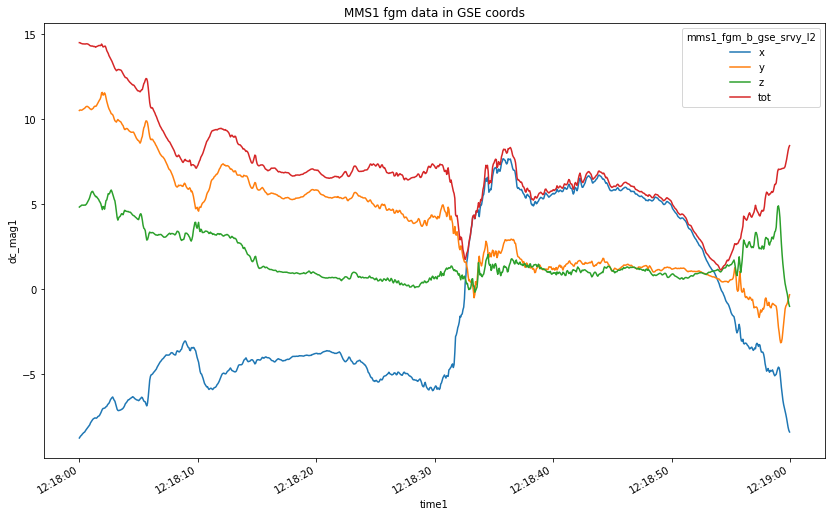

In [45]:
# Aidapy has some nice built-in plotting routines. There are also built-in statistic packages.
#%matplotlib widget

fig=xr_mms['dc_mag1'].plot.line(x='time1')
plt.gcf().set_size_inches(14, 8)
plt.title('MMS1 fgm data in GSE coords')
plt.show()


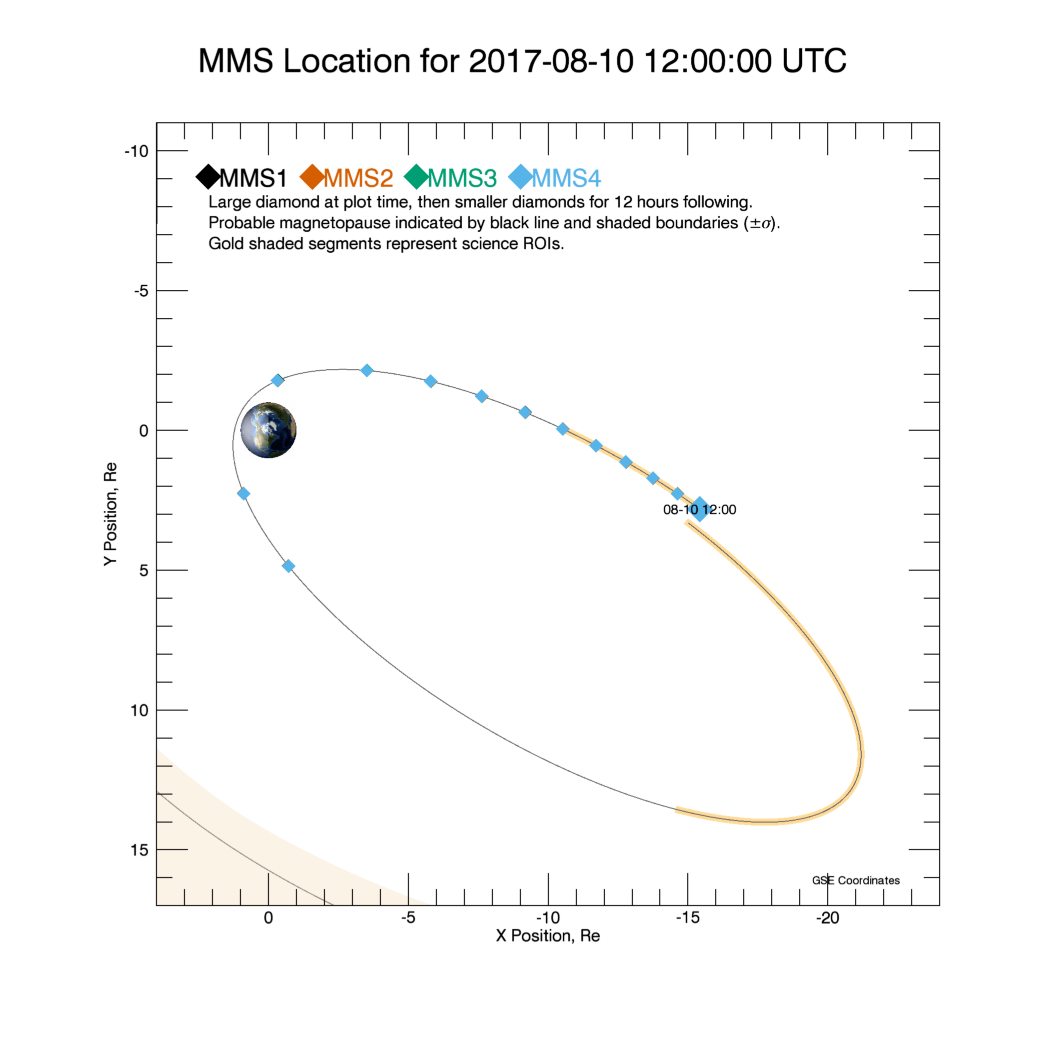

In [46]:
url_sdc = 'https://lasp.colorado.edu/mms/sdc/public/data/sdc/mms_orbit_plots/'
url_sdc += 'mms_orbit_plot_{:4d}{:02d}{:02d}{:02d}0000.png'.format(start_time.year, start_time.month, start_time.day, start_time.hour)
Image(url=url_sdc, embed=True)


In [47]:
# Let's take a look under the hood of the data object we just downloaded. 

xr_mms


# The data is saved as an xarray.Dataset object. Not sure much about how these work, but in the next cell we will 
# extract raw data to an np array to allow for easy numerical analysis

<xarray.Dataset>
Dimensions:                 (mms1_fgm_b_gse_srvy_l2: 4, mms2_fgm_b_gse_srvy_l2: 4, mms3_fgm_b_gse_srvy_l2: 4, mms4_fgm_b_gse_srvy_l2: 4, time1: 960, time2: 960, time3: 960, time4: 960)
Coordinates:
  * mms1_fgm_b_gse_srvy_l2  (mms1_fgm_b_gse_srvy_l2) <U3 'x' 'y' 'z' 'tot'
  * time1                   (time1) datetime64[ns] 2017-08-10T12:18:00.016397...
  * mms2_fgm_b_gse_srvy_l2  (mms2_fgm_b_gse_srvy_l2) <U3 'x' 'y' 'z' 'tot'
  * time2                   (time2) datetime64[ns] 2017-08-10T12:18:00.027769...
  * mms3_fgm_b_gse_srvy_l2  (mms3_fgm_b_gse_srvy_l2) <U3 'x' 'y' 'z' 'tot'
  * time3                   (time3) datetime64[ns] 2017-08-10T12:18:00.002455...
  * mms4_fgm_b_gse_srvy_l2  (mms4_fgm_b_gse_srvy_l2) <U3 'x' 'y' 'z' 'tot'
  * time4                   (time4) datetime64[ns] 2017-08-10T12:18:00.040686...
Data variables:
    dc_mag1                 (time1, mms1_fgm_b_gse_srvy_l2) float32 -8.742898...
    dc_mag2                 (time2, mms2_fgm_b_gse_srvy_l2) float32 -8.837567...
    dc_mag3                 (time3, mms3_fgm_b_gse_srvy_l2) float32 -8.820305...
    dc_mag4                 (time4, mms4_fgm_b_gse_srvy_l2) float32 -8.772142...
Attributes:
    mission:        mms
    load_settings:  {'prod': ['dc_mag'], 'probes': ['1', '2', '3', '4'], 'coo...

In [73]:
# let us extract some of this field data. 
print(np.shape(np.array(xr_mms['time1'])))
print(np.shape(np.array(xr_mms['dc_mag1'][:,0])))  # double check dimensions

times=np.zeros((960,4))
Bx=np.zeros((960,4))
By=np.zeros((960,4))
Bz=np.zeros((960,4))
Btot=np.zeros((960,4))

tlabels=['time1','time2','time3','time4']
blabels=['dc_mag1','dc_mag2','dc_mag3','dc_mag4']

for i in np.arange(0,4):
    times[:,i]=np.array(xr_mms[tlabels[i]]) # in python indexing arrays uses brackets, AND STARTS AT ZERO
    Bx[:,i]=np.array(xr_mms[blabels[i]][:,0])
    By[:,i]=np.array(xr_mms[blabels[i]][:,1])
    Bz[:,i]=np.array(xr_mms[blabels[i]][:,2])
    Btot[:,i]=np.array(xr_mms[blabels[i]][:,3])



# now we have times and magnetic field data stored in "ordinary" numpy arrays -- I think this makes our lives easier. 
np.shape(Btot)

(960,)
(960,)


(960, 4)

(380.0, 750.0)

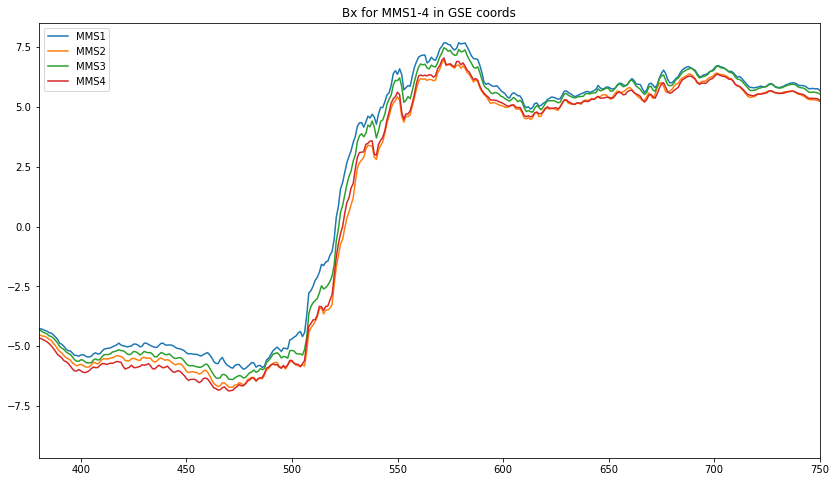

In [105]:
%matplotlib inline
# now, for example, we can plot |B| for all 4 spacecraft vs time

fig,ax=plt.subplots(figsize=(14,8))

for i in np.arange(4):
    ax.plot(np.arange(960),Bx[:,i])
    
plt.legend(['MMS1','MMS2','MMS3','MMS4'])
plt.title('Bx for MMS1-4 in GSE coords')
plt.xlim([380,750])


# judging by this plot, it looks like Aidapy does the hard work 
# for us in making sure the times for each spacecraft are aligned with one another.

rotation matrix is given by:


array([[ 0.95532572, -0.15128933, -0.2529    ],
       [ 0.26588094,  0.81597636,  0.5126    ],
       [ 0.1292845 , -0.55714144,  0.8194    ]])

(380.0, 750.0)

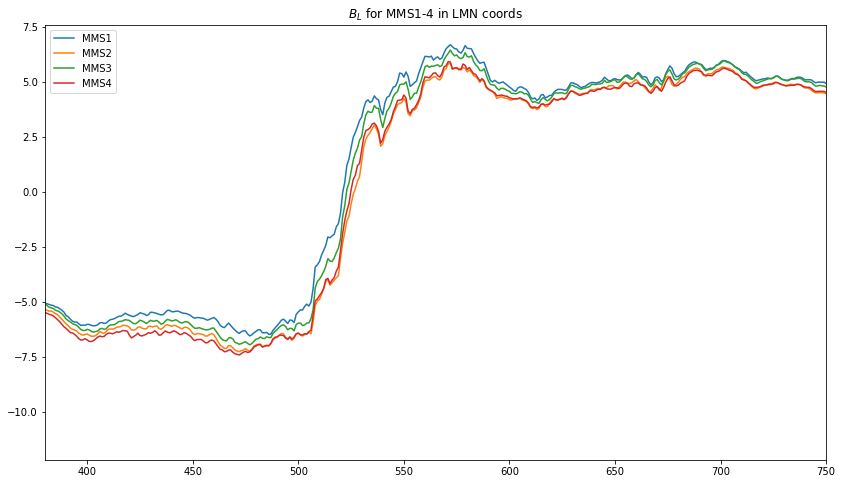

In [108]:
# let us transform to LMN basis for this event (values found through prior analysis)

Lv = np.array([0.9669,   -0.0253,   -0.2529])
Mv = np.array([0.1571,    0.8437,    0.5126])
Nv = np.array([0.2009,   -0.5355,    0.8194])
RRm=np.array([Lv,Mv,Nv]);

phi=-7.5*np.pi/180
cp=np.cos(phi);
sp=np.sin(phi);

RRxy=np.array([[cp, sp, 0 ],[ -sp, cp, 0 ], [ 0, 0, 1 ]]);  # python requires commas between array entries

RRm=np.matmul(RRm,RRxy);
print('rotation matrix is given by:')
display(RRm)


BlMat=np.zeros((960,4))
BnMat=np.zeros((960,4))
BmMat=np.zeros((960,4)) 
# print(np.shape(Blmn))

for i in np.arange(4):
    Blmn=np.zeros((960,4))
    BGSE=np.array([Bx[:,i],By[:,i],Bz[:,i]]).T
#    print(np.shape(BGSE))
    for k in np.arange(3):
        for l in np.arange(3):
            Blmn[:,k] += BGSE[:,l]*RRm[k,l];
    Blmn[:,3]=Btot[:,i];
    
    BlMat[:,i]=Blmn[:,0]
    BmMat[:,i]=Blmn[:,1]
    BnMat[:,i]=Blmn[:,2]


fig,ax=plt.subplots(figsize=(14,8))

for i in np.arange(4):
    ax.plot(np.arange(960),BlMat[:,i])
    
plt.legend(['MMS1','MMS2','MMS3','MMS4'])
plt.title('$B_L$ for MMS1-4 in LMN coords')
plt.xlim([380,750])
